# Bootstrap distribution for simulated lognormals

Bootstrap calculation of the standard error of the sample mean of N IID standard lognormals.  Figure from chapter 9.

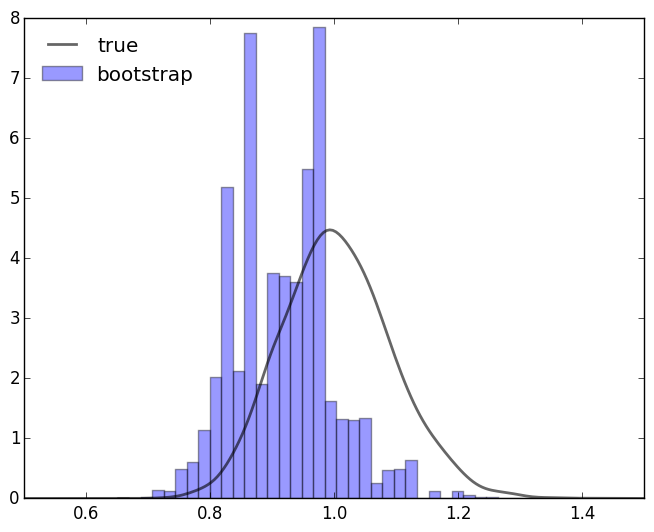

(0.5,1.5)

In [3]:

using PyPlot
using Distributions
using KernelEstimator

"""
Generates M bootstrap observations of the sampling distribution of
stat given data xo

Parameters
----------
xo : array_like
    The data as an array
stat : function
    The statistic, a function of the data
M : int
    The number of observations in the bootstrap sample
"""
function bootstrap(xo, stat, M)
    N = length(xo)
    gamma_b = Array(Float64, M)
    x_b = Array(Float64, N)
    for m in 1:M
        for i in 1:N
            x_b[i] = xo[rand(1:N)]
        end
        gamma_b[m] = stat(x_b)
    end 
    return gamma_b
end

function true_draws(d, stat, N, M)
    gamma_b = Array(Float64, M)
    for m in 1:M 
        x_b = rand(d, N)
        gamma_b[m] = stat(x_b)
    end 
    return gamma_b
end

# Figure
fig, ax = subplots()

# The primitives
N = 200
d = LogNormal()

# True sampling distribution of median
t = true_draws(d, median, N, 10000)
xmin = 0.5
xmax = 1.5
xgrid = linspace(xmin, xmax, 200)

den = kerneldensity(t, xeval=xgrid, h=0.02)

ax[:plot](xgrid, den, "k-", lw=2, alpha=0.6, label="true")


# Approx sampling distribution of median by bootstrap
b = bootstrap(rand(d, N), median, 20000)
ax[:hist](b, bins=40, alpha=0.4, normed=1, label="bootstrap")

ax[:legend](frameon=0, loc="upper left")

ax[:set_xlim](xmin, xmax)
